In [64]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

In [2]:
df = pd.read_csv('birthrates.csv')

In [3]:
# Look at the first 3 rows
df[:3]

,Country,year,month,value
0,Aland Islands,2015,January,20.0
1,Aland Islands,2015,February,24.0
2,Aland Islands,2015,March,20.0


In [4]:
# an example of masking in action
mask = df['Country'] == 'Germany'
mask2 = df[mask]['month'] == 'January'
df[mask][mask2]['value'].values.mean()

57642.0

In [5]:
# create an average value using data for 2013/14/15 where available
countries = df['Country'].unique()
months = df['month'].unique()
averaged_months = []
for country in countries:
    current_country = df['Country'] == country
    for month in months:
        current_month = df[current_country]['month'] == month
        average = df[current_country][current_month]['value'].mean()
        averaged_months.append([country, month, average])

In [6]:
months_dataframe = pd.DataFrame(averaged_months, columns=["country", "month", "value"])
months_dataframe[:3]

,country,month,value
0,Aland Islands,January,19.666667
1,Aland Islands,February,22.333333
2,Aland Islands,March,23.333333


In [7]:
countries = months_dataframe['country'].unique()
countries

array(['Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Anguilla',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Belarus', 'Belgium', 'Bermuda', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Cayman Islands', 'Chile',
       'Hong Kong SAR', 'Macao SAR', 'Costa Rica', 'Croatia', 'Cuba',
       'CuraÃ§ao', 'Cyprus', 'Czechia', 'Denmark', 'Egypt', 'Estonia',
       'Faeroe Islands', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Greenland', 'Guam', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan',
       'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
       'Montenegro', 'Montserrat', 'Netherlands', 'New Zealand', 'Norway',
       'Panama', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico',
       'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania',
       'Rus

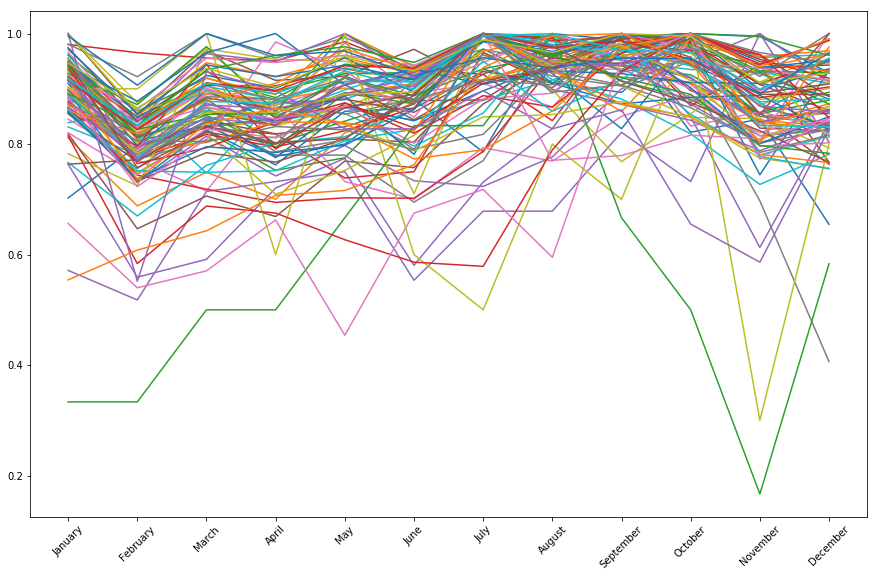

In [8]:
f, ax = plt.subplots(1, figsize=(15, 15/1.61))
time2 = [x for x in range(1, 13)]
maxima = []
maxima2 = []
time = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for country in countries:
    mask = months_dataframe['country'] == country
    values = months_dataframe[mask].values[:, 2]
    values = values / values.max()
    ax.plot(time2, values, label=months_dataframe[mask].values[0, 0])
#     ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(time2, time, rotation='45')
    months_dataframe[mask].values[:, 2]
    max_arg = np.argmax(months_dataframe[mask].values[:, 2])
    second_max = np.argsort(months_dataframe[mask].values[:, 2])[1]
    max_month = months_dataframe[mask].values[:, 1][max_arg]
    maxima.append(max_arg)
    maxima2.append(second_max)

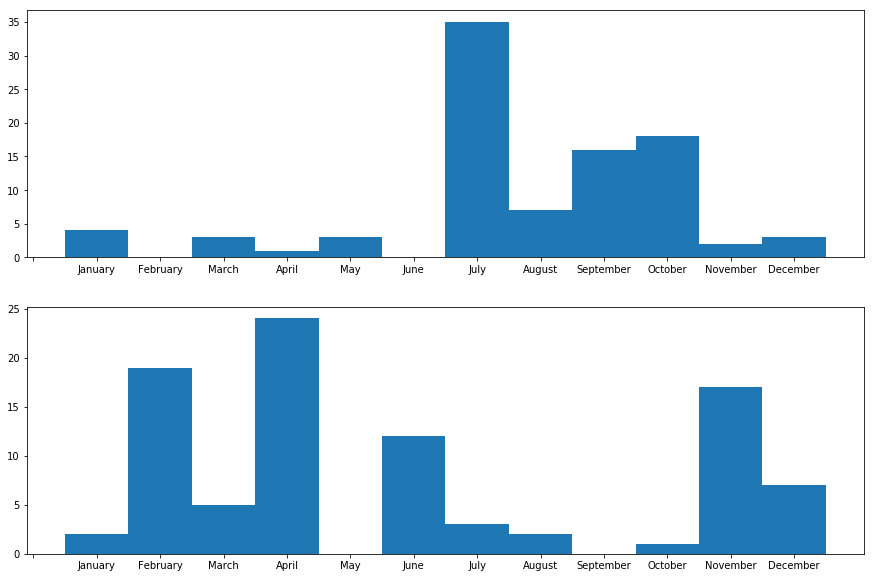

In [9]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0].xaxis.set_ticks(range(13))
ax[0].set_xticklabels([''] + time)
ax[0].hist(maxima, bins=12, align='right', range=[0, 12])

ax[1].hist(maxima2, bins=12, range=[0, 12], align='right', width=1)
ax[1].xaxis.set_ticks(range(13))
_ = ax[1].set_xticklabels([''] + time)

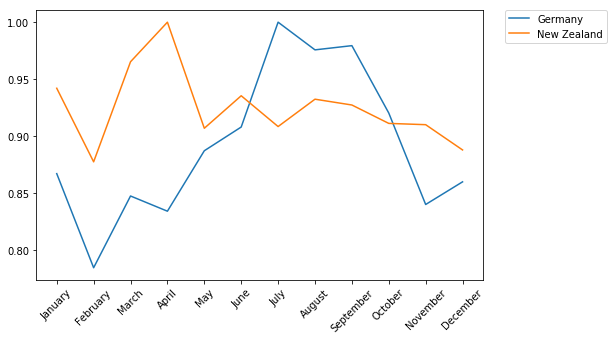

In [10]:
f, ax = plt.subplots(1, figsize=(8, 8/1.61))
time2 = [x for x in range(1, 13)]

countries = ['Aruba', 'Bermuda', 'Cuba', "Chile", "Saint Vincent and the Grenadines","Turks and Caicos Islands","Anguilla","British Virgin Islands","Cayman Islands", 'CuraÃ§ao',"Puerto Rico"]
countries = ['Germany', 'New Zealand']
for country in countries:
    mask = months_dataframe['country'] == country
    values = months_dataframe[mask].values[:, 2]
    values = values / values.max()
    ax.plot(time2, values, label=months_dataframe[mask].values[0, 0])
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(time2, time, rotation='45')
    months_dataframe[mask].values[:, 2]

time = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
value = [19.666666666666668, 22.333333333333332, 23.333333333333332, 23.666666666666668, 25.0, 24.666666666666668, 22.0, 28.0, 27.666666666666668, 23.0, 23.666666666666668, 18.333333333333332]

In [11]:
country_location = pd.read_excel('countries_location.xlsx')
country_location[['latitude', 'longitude']] = country_location[['latitude', 'longitude']].apply(pd.to_numeric)

In [12]:
latitude_bins = 4
longitude_bins = 3

latitude_bin_values = np.linspace(-90, 90, latitude_bins + 1)[::-1]
longitude_bin_values = np.linspace(-180, 180, longitude_bins + 1)

Text(0.5,1,'Countries with birthrates in red')

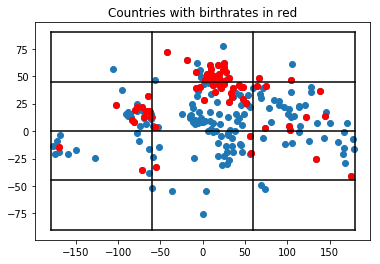

In [13]:
plt.scatter(country_location.values[:, 1], country_location.values[:, 0])
countries_w_data = set(months_dataframe['country'].unique()) & set(country_location['name'])

for country in countries_w_data:
    to_plot = country_location[country_location['name'] == country][['longitude', 'latitude']].values
    plt.scatter(to_plot[0][0], to_plot[0][1], c='r')
            
for i, item in enumerate(latitude_bin_values):
    plt.plot([-180, 180], [item, item], c='k')
for i, item in enumerate(longitude_bin_values):
    plt.plot([item, item], [-90, 90],c='k')
plt.title('Countries with birthrates in red')

## a nicer plot of countries in our dataset

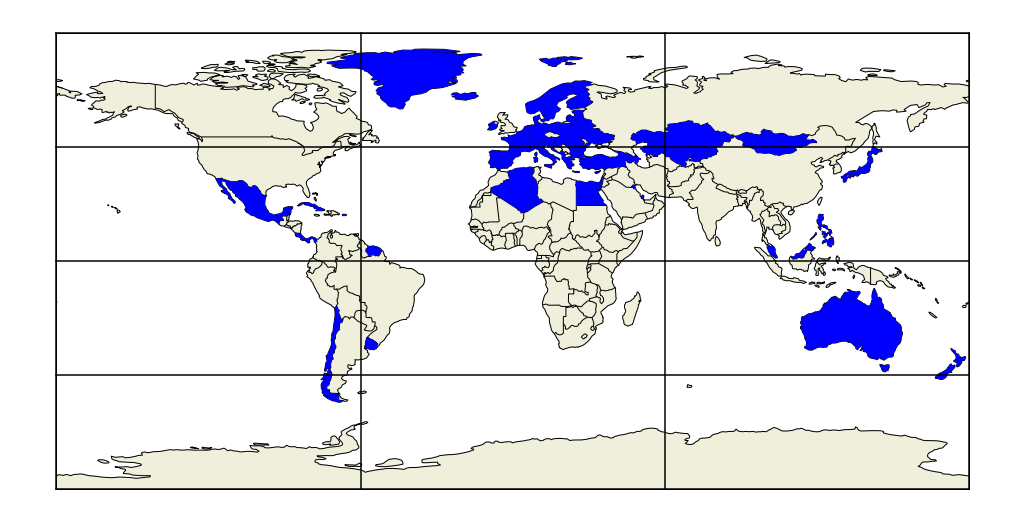

In [74]:
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

fig = plt.figure(figsize=(18, 18/1.6))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')

# plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
#          color='blue', linewidth=2, marker='o',
#          transform=ccrs.Geodetic(),
#          )

# plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
#          color='gray', linestyle='--',
#          transform=ccrs.PlateCarree(),
#          )

for i, item in enumerate(latitude_bin_values):
    plt.plot([-180, 180], [item, item], c='k', transform=ccrs.PlateCarree())
for i, item in enumerate(longitude_bin_values):
    plt.plot([item, item], [-90, 90], c='k', transform=ccrs.PlateCarree())


for country in countries:
    if country.attributes['ADMIN'] in countries_w_data:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=(0, 0, 1),
                          label=country.attributes['ADMIN'])

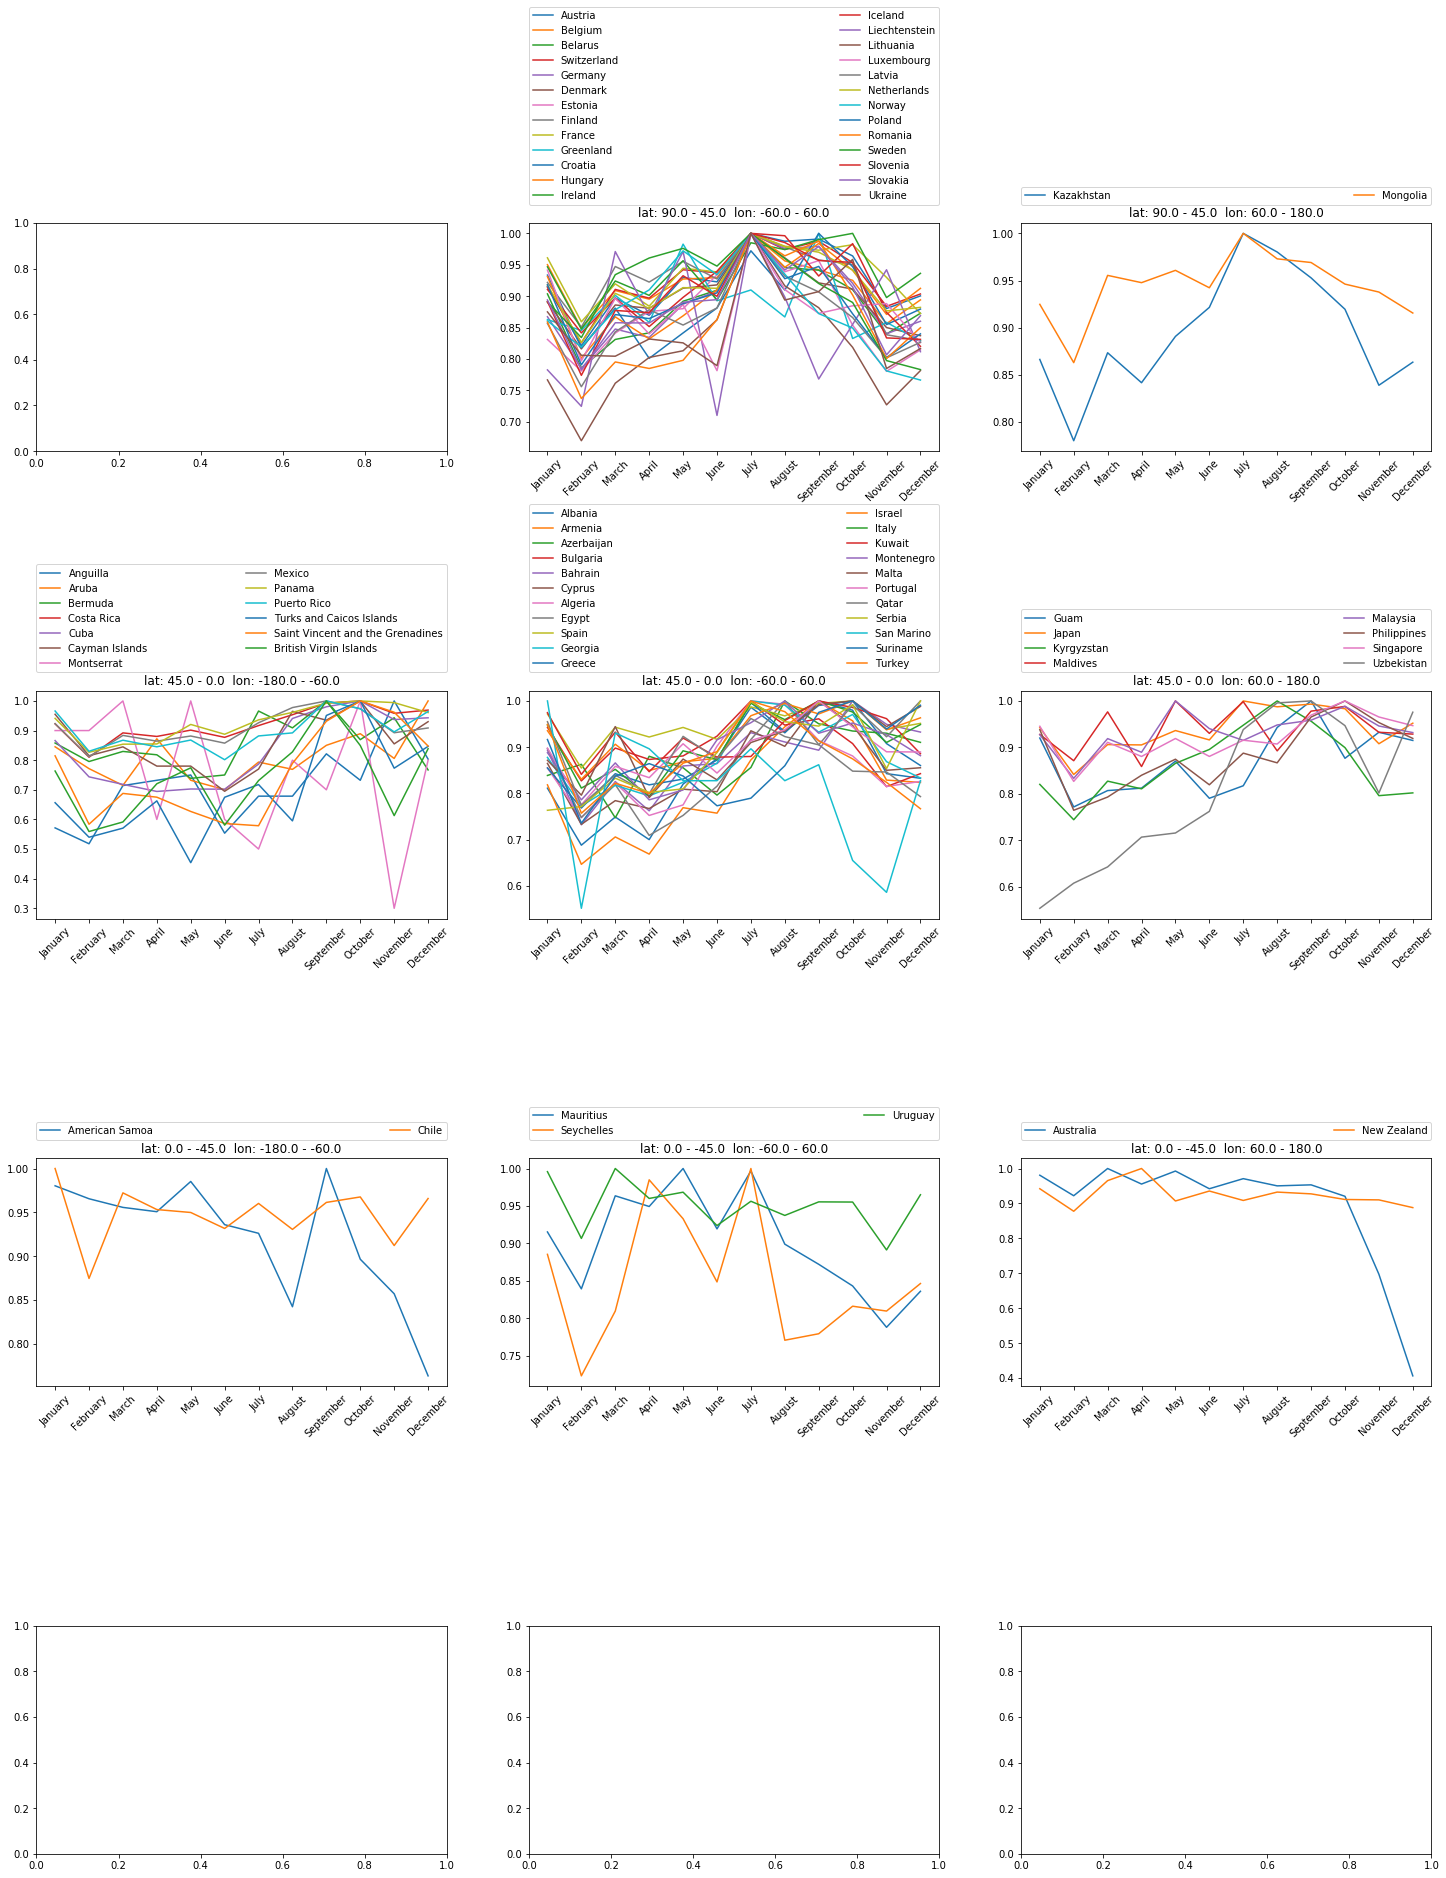

In [70]:
f, ax = plt.subplots(latitude_bins, longitude_bins, figsize=(25, 30))

for (i, j), ax in np.ndenumerate(ax):
    location_mask = (country_location['latitude'] <= latitude_bin_values[i]) & (country_location['latitude'] > latitude_bin_values[i+1]) & (country_location['longitude'] > longitude_bin_values[j]) & (country_location['longitude'] <= longitude_bin_values[j+1])
    for country in country_location[location_mask]['name']:
        if country in months_dataframe['country'].unique():
                mask = months_dataframe['country'] == country
                values = months_dataframe[mask].values[:, 2]
                values = values / values.max()
                ax.plot(time2, values, label=months_dataframe[mask].values[0, 0])
                ax.legend(bbox_to_anchor=(0., 1.08, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
                ax.set_title("lat: {} - {}  lon: {} - {}".format(latitude_bin_values[i], latitude_bin_values[i+1], longitude_bin_values[j], longitude_bin_values[j+1]))
                ax.set_xticks(time2)
                ax.set_xticklabels(time)
                plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
f.subplots_adjust(hspace=1.05)
